Wine Dataset Shape: (178, 13)
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines 

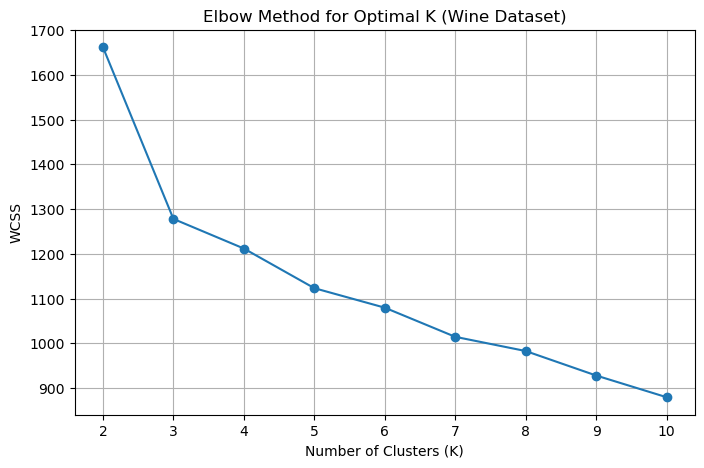

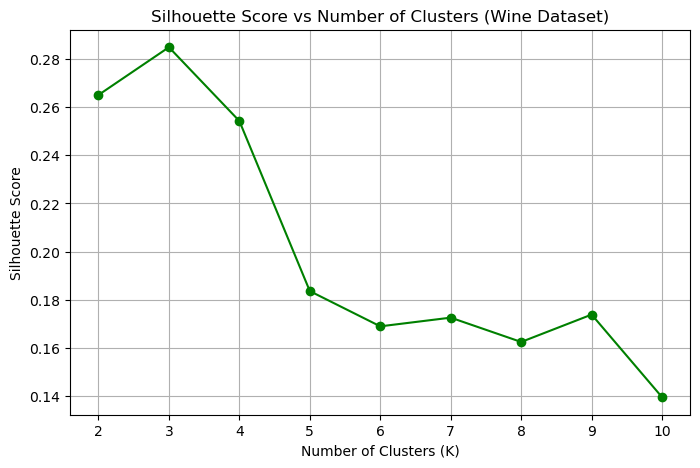

In [4]:
# ELBOW METHOD

import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd




wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)

print("Wine Dataset Shape:", X.shape)
print(X.head())


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


wcss = []
silhouette_scores = []

K_range = range(2, 11) 

for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)
    print(f"K={k}, WCSS={kmeans.inertia_:.2f}, Silhouette Score={score:.4f}")


plt.figure(figsize=(8,5))
plt.plot(range(1, 11), [None] + wcss, marker='o')
plt.title("Elbow Method for Optimal K (Wine Dataset)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()


plt.figure(figsize=(8,5))
plt.plot(K_range, silhouette_scores, marker='o', color='green')
plt.title("Silhouette Score vs Number of Clusters (Wine Dataset)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()



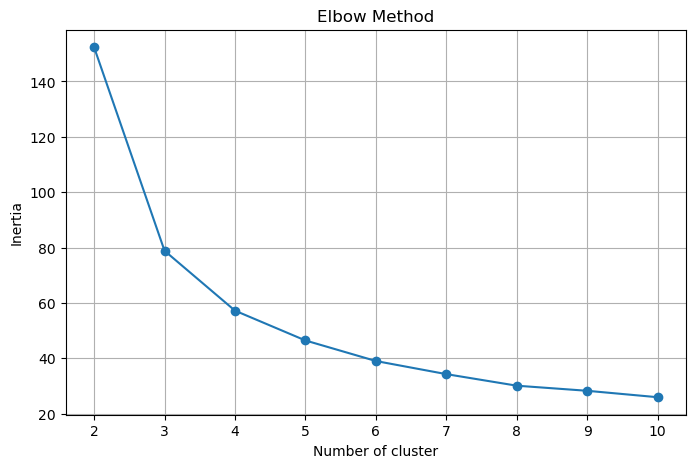

In [2]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data 
y = iris.target 


wcss = []

for k in range (2,11):
    kmeans = KMeans(n_clusters=k,random_state=42,n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(8,5))
plt.plot(range(2,11),wcss,marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of cluster")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

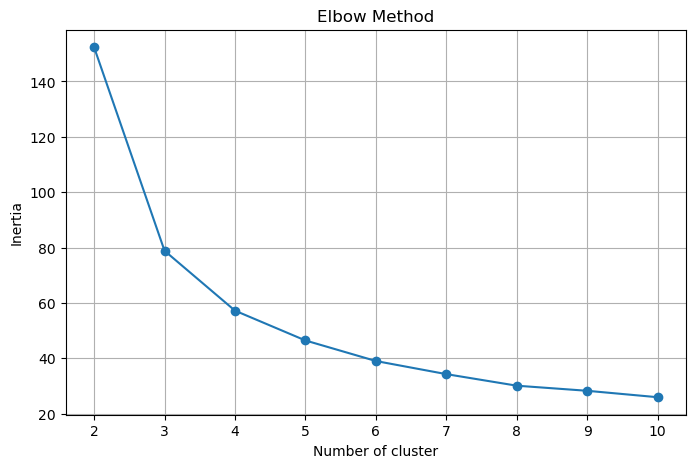

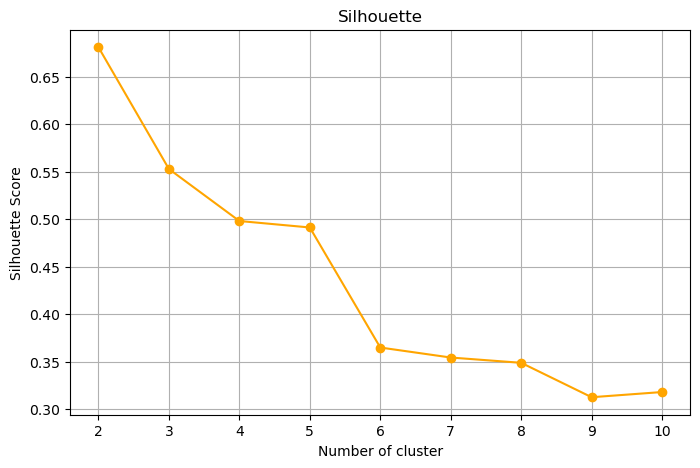

[[5.24285714 2.37142857 3.44285714 1.02857143]
 [6.02777778 2.73333333 5.02777778 1.79444444]
 [5.1        3.51304348 1.52608696 0.27391304]
 [6.43       2.94       4.59       1.435     ]
 [6.56190476 3.11428571 5.52380952 2.18095238]
 [7.64285714 3.22857143 6.5        2.2       ]
 [5.62857143 2.72380952 4.13333333 1.2952381 ]
 [5.5125     4.         1.475      0.275     ]
 [4.67894737 3.08421053 1.37894737 0.2       ]
 [7.15       2.9        5.98333333 1.83333333]]
0.3179662256824205


In [5]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data 


wcss = []
silhouette_scores = [] 

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of cluster")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)  
    score = silhouette_score(X, labels) 
    silhouette_scores.append(score) 
    
plt.figure(figsize=(8, 5))  
plt.plot(range(2, 11), silhouette_scores, marker='o', color='orange')
plt.title("Silhouette")
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()


print(kmeans.cluster_centers_)
print(silhouette_score(X, labels))

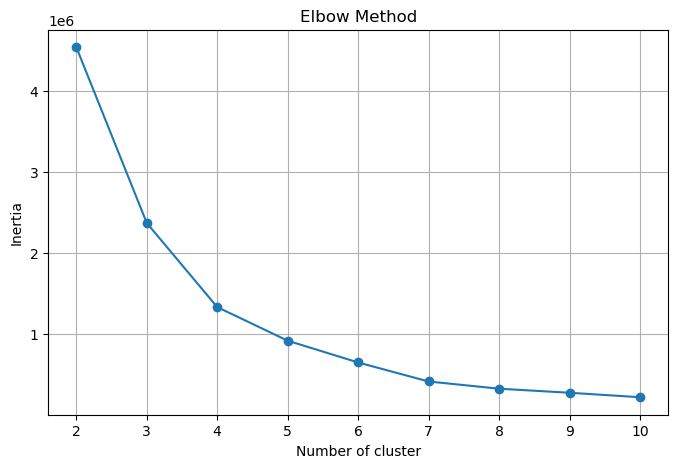

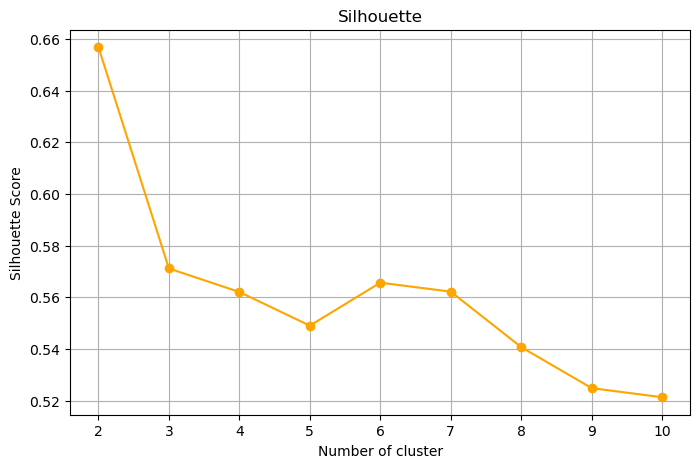

[[1.26437931e+01 2.80896552e+00 2.26724138e+00 2.07241379e+01
  9.27586207e+01 1.80034483e+00 1.35379310e+00 4.06206897e-01
  1.34310345e+00 4.53482759e+00 8.73793103e-01 2.26344828e+00
  5.29827586e+02]
 [1.36000000e+01 1.79800000e+00 2.50100000e+00 1.65000000e+01
  1.02800000e+02 2.93100000e+00 3.15800000e+00 2.91000000e-01
  2.07000000e+00 5.68600000e+00 1.05400000e+00 2.98300000e+00
  1.14150000e+03]
 [1.27950000e+01 2.41312500e+00 2.42593750e+00 2.05250000e+01
  9.69687500e+01 2.01500000e+00 1.33187500e+00 4.21250000e-01
  1.33812500e+00 6.01250000e+00 8.48125000e-01 2.13937500e+00
  6.48343750e+02]
 [1.41366667e+01 1.83166667e+00 2.41166667e+00 1.62666667e+01
  1.07666667e+02 3.25500000e+00 3.49333333e+00 2.71666667e-01
  2.21666667e+00 7.23333333e+00 1.11333333e+00 3.02833333e+00
  1.53033333e+03]
 [1.38278571e+01 1.74214286e+00 2.53428571e+00 1.76000000e+01
  1.06214286e+02 2.75928571e+00 2.90500000e+00 3.05714286e-01
  1.77642857e+00 5.93214286e+00 1.11857143e+00 3.00000000e+0

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt


wine = load_wine()
X = wine.data
y = wine.target


wcss = []
silhouette_scores = [] 

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of cluster")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)  
    score = silhouette_score(X, labels) 
    silhouette_scores.append(score) 
    
plt.figure(figsize=(8, 5))  
plt.plot(range(2, 11), silhouette_scores, marker='o', color='orange')
plt.title("Silhouette")
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()


print(kmeans.cluster_centers_)
print(silhouette_score(X, labels))